In [ ]:
! pip install -q kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"ashrithareddyvangala","key":"e7fd89cbe5485e694ec63df35558a8f2"}'}

In [ ]:
 ! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
 ! chmod 600 ~/.kaggle/kaggle.json


mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! kaggle datasets download -d puneet6060/intel-image-classification
! unzip intel-image-classification.zip

Streaming output truncated to the last 5000 lines.
  inflating: seg_train/seg_train/mountain/7506.jpg  
  inflating: seg_train/seg_train/mountain/7537.jpg  
  inflating: seg_train/seg_train/mountain/7539.jpg  
  inflating: seg_train/seg_train/mountain/7551.jpg  
  inflating: seg_train/seg_train/mountain/7560.jpg  
  inflating: seg_train/seg_train/mountain/7565.jpg  
  inflating: seg_train/seg_train/mountain/7578.jpg  
  inflating: seg_train/seg_train/mountain/7581.jpg  
  inflating: seg_train/seg_train/mountain/7586.jpg  
  inflating: seg_train/seg_train/mountain/7647.jpg  
  inflating: seg_train/seg_train/mountain/7652.jpg  
  inflating: seg_train/seg_train/mountain/7654.jpg  
  inflating: seg_train/seg_train/mountain/7662.jpg  
  inflating: seg_train/seg_train/mountain/767.jpg  
  inflating: seg_train/seg_train/mountain/7672.jpg  
  inflating: seg_train/seg_train/mountain/7679.jpg  
  inflating: seg_train/seg_train/mountain/7681.jpg  
  inflating: seg_train/seg_train/mountain/7693.jp

In [ ]:
#import image datagenerator library
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2,zoom_range=0.2,horizontal_flip=True)

In [ ]:
train_data = train_datagen.flow_from_directory('/content/seg_train/seg_train',target_size=(224,224),batch_size=15,class_mode='categorical')

Found 14034 images belonging to 6 classes.


In [ ]:
test_data = train_datagen.flow_from_directory('/content/seg_test/seg_test',target_size=(224, 224),batch_size=15,class_mode='categorical')

Found 3000 images belonging to 6 classes.


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import softmax
from keras.api._v2.keras import activations

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Flatten

In [ ]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import softmax

In [ ]:
imageSize=[224,224]
train_path = '/content/seg_train/seg_train'
valid_path = '/content/seg_test/seg_test'

vgg = VGG16(input_shape=imageSize + [3], weights='imagenet', include_top=False)

In [ ]:
for layer in vgg.layers:
  layer.trainable=False

In [ ]:
from glob import glob
folders = glob("/content/seg_train/seg_train/*")

In [ ]:
folders

['/content/seg_train/seg_train/street',
 '/content/seg_train/seg_train/mountain',
 '/content/seg_train/seg_train/glacier',
 '/content/seg_train/seg_train/forest',
 '/content/seg_train/seg_train/buildings',
 '/content/seg_train/seg_train/sea']

In [ ]:
y=Flatten()(vgg.output)

In [ ]:
from keras.api._v2.keras import activations
final = Dense(len(folders), activation = 'softmax') (y)


In [ ]:
from tensorflow.keras.models import Model

In [ ]:
vgg16_model=Model(inputs=vgg.input,outputs = final)

In [ ]:
vgg16_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [ ]:
vgg16_model.compile(optimizer = 'adam' , loss ='categorical_crossentropy',metrics = ['Accuracy'],run_eagerly=True)

In [ ]:
len(test_data)//15

13

In [ ]:
import sys
r=vgg16_model.fit_generator(train_data,epochs = 20,validation_data=test_data,steps_per_epoch=len(train_data)//15,validation_steps=len(test_data)//15)

<ipython-input-70-473066f39dbe>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r=vgg16_model.fit_generator(train_data,epochs = 20,validation_data=test_data,steps_per_epoch=len(train_data)//15,validation_steps=len(test_data)//15)


Epoch 1/20
62/62 [==============================] - 28s 455ms/step - loss: 0.5346 - Accuracy: 0.8559 - val_loss: 0.6514 - val_Accuracy: 0.8410
Epoch 2/20
62/62 [==============================] - 25s 397ms/step - loss: 0.3976 - Accuracy: 0.8710 - val_loss: 0.7025 - val_Accuracy: 0.8103
Epoch 3/20
62/62 [==============================] - 29s 460ms/step - loss: 0.3609 - Accuracy: 0.8853 - val_loss: 0.5712 - val_Accuracy: 0.8410
Epoch 4/20
62/62 [==============================] - 26s 421ms/step - loss: 0.3876 - Accuracy: 0.8839 - val_loss: 0.5624 - val_Accuracy: 0.8308
Epoch 5/20
62/62 [==============================] - 25s 405ms/step - loss: 0.5283 - Accuracy: 0.8505 - val_loss: 0.7532 - val_Accuracy: 0.8205
Epoch 6/20
62/62 [==============================] - 25s 397ms/step - loss: 0.4511 - Accuracy: 0.8581 - val_loss: 0.6959 - val_Accuracy: 0.8462
Epoch 7/20
62/62 [==============================] - 27s 428ms/step - loss: 0.4776 - Accuracy: 0.8688 - val_loss: 0.4851 - val_Accuracy: 0.8667

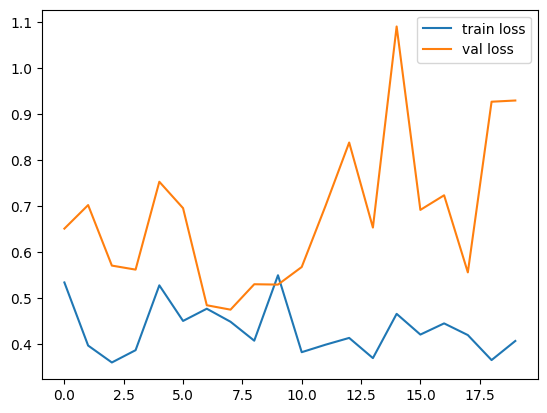

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
#plot the loss
plt.plot(r.history['loss'],label='train loss')
plt.plot(r.history['val_loss'],label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')



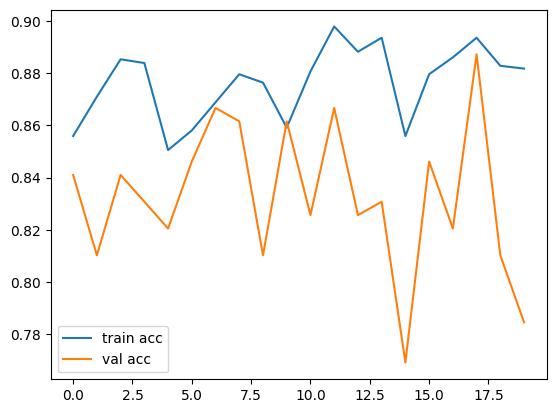

<Figure size 640x480 with 0 Axes>

In [ ]:
#plot the accuracy
plt.plot(r.history['Accuracy'],label='train acc')
plt.plot(r.history['val_Accuracy'],label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
vgg16_model.save("cnn.h5")

In [ ]:
# prompt: code for numpy

import numpy as np



In [ ]:
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [ ]:
labels=['0_buildings','1_forest','2_glacier','3_mountain','4_sea','5_street']


In [ ]:
img_path='/content/seg_test/seg_test/buildings/20061.jpg'


In [ ]:
img = load_img(img_path, target_size=(224, 224))
x = img_to_array(img)
X = preprocess_input(x)
preds = vgg16_model.predict(np.array([x]))
preds

1/1 [==============================] - 0s 31ms/step


array([[1., 0., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
labels [np.argmax(preds)]

'0_buildings'